# L3 Analyse Numérique – TP4

[Le Scornet P](mailto:pierre.le-scornet@ens-rennes.fr) &
[Le Barbenchon P](mailto:pierre.le-barbenchon@ens-rennes.fr). TP ENS Rennes

[Boutin B](mailto:benjamin.boutin@univ-rennes1.fr). Cours et TP Université de Rennes 1 - UFR Mathématiques  

Dans ce TP, nous étudierons la mathéode des moindres carrés qui permet d'“approcher” une solution de $Ax= b$ lorsque $A$ n'est pas inversible puis nous étudierons les méthodes de gradient.

**IMPORTANT :** L'Exercice 2 est à rendre par mail (à Pierre Le Barbenchon ET Pierre Le Scornet) avant le dimanche 27 février à 23h59 en format .ipynb afin que nous puissions exécuter les cellules de votre notebook, vous pouvez nous envoyer tout le TP, nous ne regarderons que l'Exercice 2. Pour les questions dont les réponses ne contiennent pas de code, vous avez le choix entre joindre une photo/un pdf de votre réponse, ou écrire directement en $\LaTeX$ à l'intérieur d'un bloc de texte (tutoriel disponible [ici](https://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html?highlight=latex#LaTeX-equations)).


- Exercice 1. Moindres carrés.
- Exercice 2. Minimum d'une fonctionnelle quadratique strictement convexe.

Nous importons avant tout quelques librairies qui seront utiles.

In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt

## Exercice 1. Moindres carrés

On souhaite déterminer la linéarisation de l'expression trigonométrique 
$
\cos^5x\,(1+\sin^3x),% = \dfrac{1}{128}\Big(80\cos(x)+40\cos(3x)+8\cos(5x)+6\sin(2x)+2\sin(4x)-2\sin(6x)-\sin(8x)\Big).
$
c'est à dire les coefficients rationnels $(a_j)_{0\leq j\leq d}$ et $(b_j)_{1\leq j \leq d}$ tels que 
$$
\cos^5x\,(1+\sin^3x) = a_0 + \sum_{j=1}^d a_j \cos (jx) + b_j \sin (jx)
$$


### Question 1)

Considérer un entier $N$ suffisamment grand et constituer le vecteur colonne $F$ de taille $N$ comme suit:

```python
X = 2*pi/N*np.arange(N)
F = np.cos(X)**5*(1+np.sin(X)**3)
```

In [30]:
N = 20
X = 2*pi/N*np.arange(N)
F = np.cos(X)**5*(1+np.sin(X)**3)

print(F)

[ 1.00000000e+00  8.01053575e-01  4.16947003e-01  1.07311267e-01
  5.24180059e-03  1.72160802e-81 -5.24180059e-03 -1.07311267e-01
 -4.16947003e-01 -8.01053575e-01 -1.00000000e+00 -7.55132853e-01
 -2.76188618e-01 -3.30099762e-02 -3.93820892e-04 -0.00000000e+00
  3.93820892e-04  3.30099762e-02  2.76188618e-01  7.55132853e-01]


On doit trouver le résultat suivant :
$$
\begin{aligned}
\cos^5(x)(1+\sin^3(x)) &=  \dfrac{1}{128}\Bigl[80\cos(x) + 40\cos(3x) + 8\cos(5x) + 6\sin(2x) + 2\sin(4x) -2\sin(6x) -\sin(8x)\Bigr]
\end{aligned}
$$

### Question 2)

Définir une fonction ```base(d,X)``` prenant en argument un entier ```d``` supérieur ou égal à 1, et un vecteur colonne ```X``` de taille notée $N$, et renvoyant la matrice suivante
$$
\texttt{A} = \begin{pmatrix}
1 & \cos \texttt{X}_1 & \cdots &\cos \texttt{d}\texttt{X}_1 & \sin \texttt{X}_1 & \cdots &\sin \texttt{d}\texttt{X}_1\\
1 & \cos \texttt{X}_2  & \cdots &\cos \texttt{d}\texttt{X}_2 & \sin \texttt{X}_2 & \cdots &\sin \texttt{d}\texttt{X}_2\\
\vdots & \vdots & & \vdots &\vdots & & \vdots  \\
1 & \cos \texttt{X}_\texttt{N} & \cdots &\cos \texttt{d}\texttt{X}_\texttt{N} & \sin \texttt{X}_\texttt{N} & \cdots &\sin \texttt{d}\texttt{X}_\texttt{N}\\
\end{pmatrix}
$$

In [32]:
def base(d, X):
    N, = np.shape(X)
    M = np.zeros((N, 2*d+1))
    for j in range(d+1):
        M[:, j] = np.cos(j*X)
    for j in range(d+1, 2*d+1):
        M[:,j] = np.sin((j-d)*X)
    return M
print(base(5, np.array([1, 2, 3])))

[[ 1.          0.54030231 -0.41614684 -0.9899925  -0.65364362  0.28366219
   0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427]
 [ 1.         -0.41614684 -0.65364362  0.96017029 -0.14550003 -0.83907153
   0.90929743 -0.7568025  -0.2794155   0.98935825 -0.54402111]
 [ 1.         -0.9899925   0.96017029 -0.91113026  0.84385396 -0.75968791
   0.14112001 -0.2794155   0.41211849 -0.53657292  0.65028784]]


### Question 3) 

Pour des valeurs de ```d``` de plus en plus grandes, déterminer le vecteur ```C``` de taille ```2d+1```, solution au sens des moindres carrés de l'équation
$
\texttt{A}\, \texttt{C} = \texttt{F}.
$ On utilisera la commande ```np.linalg.lstsq(a,b,rcond=None)[0]``` qui renvoie la solution $x$ de $ax=b$ au sens des moindres carrés.

In [46]:
N = 100
d = 10
X = 2*pi/N*np.arange(N)

A = base(d, X)
F = np.cos(X)**5*(1+np.sin(X)**3)

np.linalg.lstsq(A,F,rcond=None)[0]

array([ 8.88178420e-17,  6.25000000e-01, -1.04083409e-16,  3.12500000e-01,
        2.91433544e-16,  6.25000000e-02,  2.49800181e-16,  2.60208521e-16,
       -2.77555756e-17, -5.55111512e-17,  1.66533454e-16, -3.98986399e-17,
        4.68750000e-02, -9.71445147e-17,  1.56250000e-02, -3.46944695e-17,
       -1.56250000e-02, -1.11022302e-16, -7.81250000e-03, -3.05311332e-16,
       -2.77555756e-16])

### Question 4)

On considère désormais une valeur ```d``` pour laquelle la norme du résidu $\|\texttt{A}\, \texttt{C} - \texttt{F}\|$ est jugée suffisamment petite. Déterminer une expression rationnelle des coefficients de la solution retenue ```C``` et la linéarisation recherchée.

In [39]:
N = 100
d = 10

X = 2*pi/N*np.arange(N)

A = base(d, X)
F = np.cos(X)**5*(1+np.sin(X)**3)

C = np.linalg.lstsq(A,F,rcond=None)[0]
print("128x(coeffs linéarisation) =", 128*C)

np.linalg.norm(A.dot(C)-F)

#On retient la valeur d = 10 qui suffit (erreur de l'ordre e-15)

128x(coeffs linéarisation) = [ 1.13686838e-14  8.00000000e+01 -1.33226763e-14  4.00000000e+01
  3.73034936e-14  8.00000000e+00  3.19744231e-14  3.33066907e-14
 -3.55271368e-15 -7.10542736e-15  2.13162821e-14 -5.10702591e-15
  6.00000000e+00 -1.24344979e-14  2.00000000e+00 -4.44089210e-15
 -2.00000000e+00 -1.42108547e-14 -1.00000000e+00 -3.90798505e-14
 -3.55271368e-14]


5.832391345068773e-15

### Question 5)

Déterminer numériquement la matrice symétrique définie positive intervenant dans l'équation normale.

In [47]:
Mat = (np.transpose(A)).dot(A)
print("Matrice de l'équation normale", Mat)
print("valeurs propres", np.linalg.eig(Mat)[0])

Matrice de l'équation normale [[ 1.00000000e+02 -7.77156117e-16  5.10702591e-15  7.99360578e-15
   1.55431223e-15  5.66213743e-15  2.22044605e-16 -4.99600361e-15
   8.88178420e-15 -1.82076576e-14  3.75255382e-14  6.70297151e-15
  -1.60982339e-15 -2.74780199e-15  0.00000000e+00 -6.77236045e-15
  -8.60422844e-15  2.72004641e-15 -5.27355937e-15 -1.34336986e-14
  -3.41948692e-14]
 [-7.77156117e-16  5.00000000e+01  4.44089210e-15  5.77315973e-15
   6.43929354e-15  1.56011433e-15 -1.89570459e-15  8.68285163e-15
   8.58388671e-16  1.14683405e-14  2.01217160e-15 -1.25424465e-15
  -6.33637955e-15 -4.56818333e-15 -6.61375307e-15  1.03853187e-15
  -3.88266182e-15 -2.10942375e-15  3.21964677e-15 -4.44089210e-15
  -1.11022302e-14]
 [ 5.10702591e-15  4.44089210e-15  5.00000000e+01  4.77395901e-15
   2.88657986e-15  1.27787857e-14  2.72654495e-15  1.07236572e-14
   5.37616653e-15 -3.24003197e-15 -5.33956610e-15 -1.26222954e-16
  -2.39183276e-16 -8.10831682e-15  4.15640553e-15 -1.65667756e-16
  -4.478

### Question 6)

Linéariser également l'expression $(1+\cos^3(2x) + \sin^3(2x))\cos^{10}(x)$.

In [52]:
X = 2*pi/N*np.arange(N)
F = (1+np.cos(2*X)**3+np.sin(2*X)**3)*np.cos(X)**10

A = base(d, X)
Mat = (np.transpose(A)).dot(A)

coeffs = np.linalg.lstsq(Mat, np.transpose(A).dot(F),rcond=None)[0]
print("4096x(coeffs linéarisation) = ", 4096*coeffs)

4096x(coeffs linéarisation) =  [ 1.68300000e+03  0.00000000e+00  2.92600000e+03  1.56319402e-12
  1.93600000e+03  1.85451654e-12  1.00200000e+03 -5.11590770e-13
  4.28000000e+02  1.02318154e-12  1.58000000e+02 -1.05870868e-12
  2.86000000e+02  1.31450406e-13  2.86000000e+02 -7.10542736e-13
  7.80000000e+01 -1.71951342e-12 -7.80000000e+01 -1.70530257e-13
 -9.00000000e+01]


On doit trouver le résultat suivant :
$$
\begin{aligned}
(1+\cos^3(2x) + \sin^3(2x))\cos^{10}(x) &=  \dfrac{1}{4096}
\Bigl[ 1683 + 2926\cos(2x) + 1936\cos(4x) + 1002\cos(6x) + 428\cos(8 
 x)\\ &+ 158\cos(10x) + 48\cos(12x) + 10\cos(14x) + \cos(16x) + 286\sin(2x) \\ &+ 286\sin(4x) + 78\sin( 
 6x)  -78\sin(8x)  -90\sin(10x)  -42\sin(12x) \\
 & -10\sin(14x)  -\sin(16x)\Bigr]
 \end{aligned}$$

## Exercice 2. Minimum d'une fonctionnelle quadratique strictement convexe


Soit $n$ un entier naturel non-nul et $J:\mathbb R^n \rightarrow \mathbb R$ une fonctionnelle prenant la forme
\begin{equation}
    J(x) = \frac{1}{2} \langle Ax,x\rangle - \langle b,x\rangle,
\end{equation}
où $b\in\mathbb R^n$ et $A\in S_n^{++}(\mathbb R)$. Dans ce cadre, il est connu (cf. cours) que la fonctionnelle $J$ admet un minimum global sur $\mathbb R^n$, atteint en un unique point $x\in\mathbb R^n$ solution de l'équation $\nabla J(x)= 0$ où $\nabla J(x) := Ax-b$.






### Question 1)

On considère pour premier exemple les données suivantes:
$$
b=\begin{pmatrix}0\\0\end{pmatrix},\qquad A=\begin{pmatrix}1 & 0\\0 & \tfrac{1}{20}\end{pmatrix}.
$$

Ecrire une fonction ```gradient_pas_fixe(A,b,x0,rho,itmax,eps)``` qui renvoie les itérés $(x_k)_{k\geq 0}$ obtenus par la <i>méthode du gradient à pas fixe</i>, partant de l'initialisation $x_0={}^t(1,1)\in\mathbb R^2$ en utilisant les deux conditions :
- ```itmax``` le nombre d'itérations maximal.
- ```eps``` epsilon l'erreur maximal qu'on s'autorise à la fin de l'algorithme.

<b>Méthode du gradient à pas fixe</b> $\rho>0$
$$
\begin{cases}
x_0\in\mathbb{R}^n\\
x_{k+1}=x_k-\rho \nabla J(x_k).%,\quad k\geq 0.
\end{cases}
$$

In [62]:
def gradient_pas_fixe(A,b,x0,rho,itmax,eps):
    x = x0
    print(x)
    i = 0
    err = eps+1
    while i<=itmax and err>eps:
        x_ = x-rho*(A.dot(x)-b)
        print(x_)
        i += 1
        err = np.linalg.norm(x_-x)
        x = x_
    return x

b = np.array([0, 0])
A = np.array([[1,  0  ],
              [0, 1/20]])
x0 = np.array([1, 1])

gradient_pas_fixe(A, b, x0, 1, 1000, 1e-10)

[1 1]
[0.   0.95]
[0.     0.9025]
[0.       0.857375]
[0.         0.81450625]
[0.         0.77378094]
[0.         0.73509189]
[0.        0.6983373]
[0.         0.66342043]
[0.         0.63024941]
[0.         0.59873694]
[0.         0.56880009]
[0.         0.54036009]
[0.         0.51334208]
[0.         0.48767498]
[0.         0.46329123]
[0.         0.44012667]
[0.         0.41812034]
[0.         0.39721432]
[0.        0.3773536]
[0.         0.35848592]
[0.         0.34056163]
[0.         0.32353354]
[0.         0.30735687]
[0.         0.29198902]
[0.         0.27738957]
[0.         0.26352009]
[0.         0.25034409]
[0.         0.23782689]
[0.         0.22593554]
[0.         0.21463876]
[0.         0.20390683]
[0.         0.19371148]
[0.         0.18402591]
[0.         0.17482461]
[0.         0.16608338]
[0.         0.15777921]
[0.         0.14989025]
[0.         0.14239574]
[0.         0.13527595]
[0.         0.12851216]
[0.         0.12208655]
[0.         0.11598222]
[0.         0.

array([0.00000000e+00, 1.85205241e-09])

### Question 2)
Représenter les itérations successives dans le plan $\mathbb R^2$ pour ```itmax = 100``` et ```eps = 0.01```. Pour le pas $\rho$, on choisira par exemple successivement les valeurs parmi $\{0.10,1,1.98\}$. Sur une autre figure on tracera également l'évolution du résidu $\|Ax_k-b\|_2$ en fonction de $k$ pour chacun des cas.

itérations successives
24


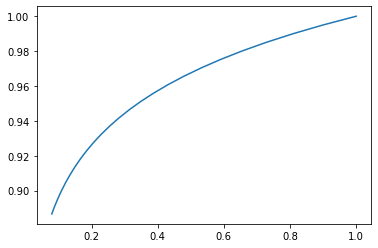

33


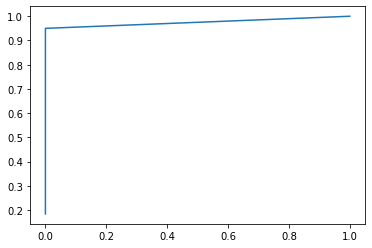

101


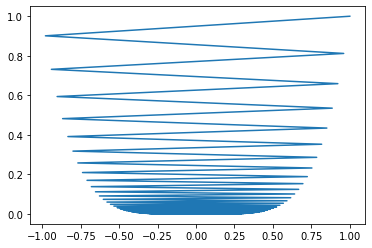

évolution des résidus


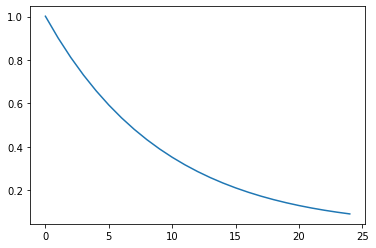

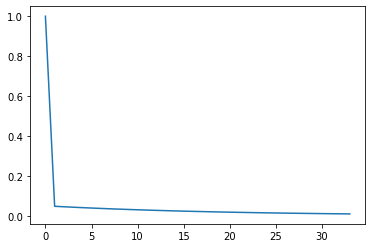

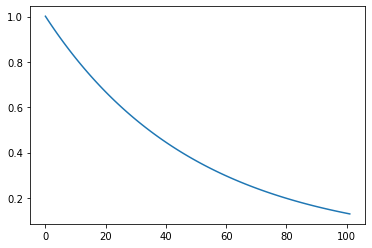

In [64]:
def iterations(rho):
    
    b = np.array([0, 0])
    A = np.array([[1,  0  ],
                  [0, 1/20]])
    x = np.array([1, 1])
    
    Lx = []; Ly = []
    
    Lx.append(x[0]); Ly.append(x[1])
    
    i = 0
    err = 1.
    
    while i<=100 and err>0.01:
        x_ = x-rho*(A.dot(x)-b)
        Lx.append(x_[0]); Ly.append(x_[1])
        i += 1
        err = np.linalg.norm(x_-x)
        x = x_
    print(i)
        
    plt.plot(np.array(Lx), np.array(Ly))
    plt.show()

print("itérations successives")
iterations(0.10); iterations(1.); iterations(1.98)

print("évolution des résidus")

def residus(rho):
    
    b = np.array([0, 0])
    A = np.array([[1,  0  ],
                  [0, 1/20]])
    x = np.array([1, 1])
    res = np.linalg.norm(A.dot(x))
    
    Lx = [0]; Ly = [res]
    
    i = 0
    err = 1.
    
    while i<=100 and err>0.01:
        x_ = x-rho*(A.dot(x)-b)
        res = np.linalg.norm(A.dot(x_))
        i += 1
        Lx.append(i); Ly.append(res)
        err = np.linalg.norm(x_-x)
        x = x_
        
    plt.plot(np.array(Lx), np.array(Ly))
    plt.show()
    
residus(0.10); residus(1.); residus(1.98)

### Question 3)

Dans cette question et les suivantes, on se place en dimension $n=20$ avec les données suivantes:
$$
b = \begin{pmatrix}1 \\ 0 \\ \vdots \\ 0\\ 1\end{pmatrix}
,\qquad 
    A = 
    (n+1)^2\begin{pmatrix}
      2 & -1 &  0 & \ldots & 0 \\
      -1 & 2 & -1 &  \ddots & \vdots  \\
      0  & \ddots & \ddots & \ddots & 0 \\
      \vdots & \ddots & -1 & 2 & -1  \\
    0 & \ldots & 0 & -1 & 2
  \end{pmatrix}.
$$
Tester de nouveau la convergence de l'algorithme du <i>gradient à pas fixe</i> en traçant le résidu pour quelques valeurs du pas $\rho$. Vérifier numériquement que la valeur du pas pour laquelle la vitesse de convergence semble maximale est
$$\rho_c = \tfrac{2}{\lambda_{\min} + \lambda_{\max}}, \textrm{ avec }\lambda_{\min}=\min(\mathrm{spec}(A)) \textrm{ et }\lambda_{\max}=\max(\mathrm{spec}(A)).$$




lambda_min =  9.8512112694369
lambda_max =  1754.1487887305648
rho_c =  0.0011337868480725613

pour rho =  0.0001


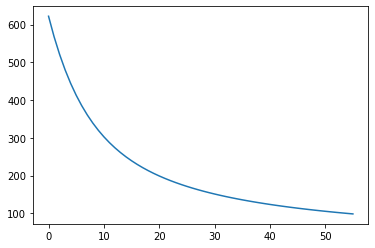

pour rho = rho_c =  0.0011337868480725613


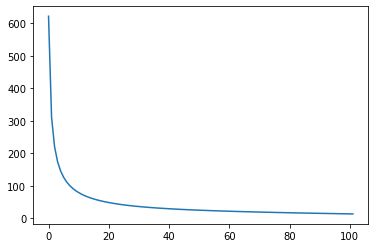

pour rho =  0.00117


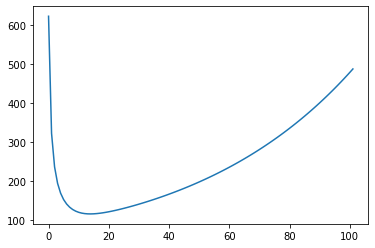


graphe du nombre d'itérations en fonction de rho


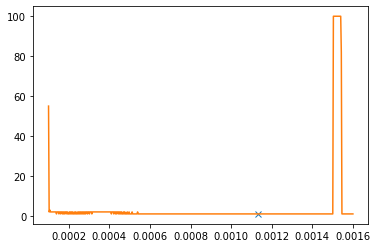

In [155]:
n = 20
A = np.diag(np.array([2 for i in range(n)])) - np.diag(np.array([1 for i in range(n-1)]), 1) - np.diag(np.array([1 for i in range(n-1)]), -1)
A *= (n+1)*(n+1)
b = np.zeros(n); b[0] = 1; b[-1] = 1
    
def residus_3(rho):
    x = np.array([1 for i in range(n)])
    res = np.linalg.norm(A.dot(x)-b)
    
    Lx = [0]; Ly = [res]
    
    i = 0
    err = 1.
    
    while i<=100 and err>0.01:
        x_ = x-rho*(A.dot(x)-b)
        res = np.linalg.norm(A.dot(x_)-b)
        i += 1
        Lx.append(i); Ly.append(res)
        err = np.linalg.norm(x_-x)
        x = x_
        
    plt.plot(np.array(Lx), np.array(Ly))
    plt.show()
    
spec = np.linalg.eig(A)[0]
lambda_min = min(spec); lambda_max = max(spec)
print("lambda_min = ", lambda_min); print("lambda_max = ", lambda_max)
rho_c = 2/(lambda_min + lambda_max)
print("rho_c = ", rho_c)

print("\n"+"pour rho = ", 0.0001); residus_3(0.0001)
print("pour rho = rho_c = ", 0.0011337868480725613); residus_3(0.0011337868480725613)
print("pour rho = ", 0.00117); residus_3(0.00117)

print("\n"+"graphe du nombre d'itérations en fonction de rho")

def vitesse_de_convergence():
    x = np.array([1 for i in range(n)])
    Lx = np.linspace(0.0001, 0.0016, 500); Ly = []
    for rho in Lx:
        i = 0
        err = 1.
    
        while i<=99 and err>0.01:
            x_ = x-rho*(A.dot(x)-b)
            i += 1
            err = np.linalg.norm(x_-x)
            x = x_
        Ly.append(i)
    rho = rho_c
    while i<=99 and err>0.01:
            x_ = x-rho*(A.dot(x)-b)
            i += 1
            err = np.linalg.norm(x_-x)
            x = x_
    plt.plot(np.array([rho]), np.array([i]), "x")
        
    plt.plot(Lx, np.array(Ly))
    plt.show()
    
vitesse_de_convergence()


### Question 4)

Retenir le choix $\rho=\rho_c$ et vérifier numériquement que la convergence est alors au plus géométrique, de raison $r \overset{def}{=}\tfrac{\kappa -1}{\kappa + 1}$, où $\kappa$ est le conditionnement de $A$ en norme 2, à savoir ici $\kappa = \mathrm{cond}_2(A)=\lambda_{\max}/\lambda_{\min}$, autrement dit vérifier numériquement que 
$$\|Ax_k-b\| \leqslant C r^k.$$


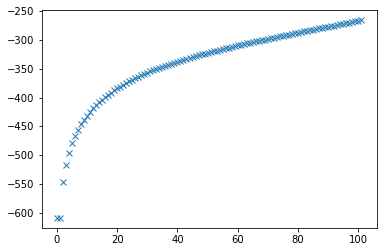

In [130]:
kappa = lambda_max/lambda_min
r = (kappa-1)/(kappa+1)
inv_coeff = 1/np.log(r)
rho = rho_c
    
def verif():
    x = np.array([1.5 for i in range(n)])
    Lx = [0]; Ly = [inv_coeff*np.log(np.linalg.norm(A.dot(x)-b))]
    
    i = 0
    err = 1.
    
    while i<=100 and err>0.01:
        x_ = x-rho*(A.dot(x)-b)
        i += 1
        err = np.linalg.norm(x_-x)
        #print(err)
        Lx.append(i); Ly.append(inv_coeff*np.log(np.linalg.norm(A.dot(x)-b)))
        x = x_
        
    plt.plot(np.array(Lx), np.array(Ly), 'x')
    plt.show()
    
verif()
#L'asymptote de la courbe est bien une droite affine de pente environ égale à 1

### Question 5)

<b>Méthode du gradient à pas optimal</b>
$$
\begin{cases}
x_0\in\mathbb{R}^n\\
\rho_k=\mathrm{argmin}_{\rho\in\mathbb R}J(x_k-\rho\nabla J(x_k)),\\%\quad k\geq 0\\
x_{k+1}=x_k-\rho_k\nabla J(x_k).%,\quad k\geq 0.
\end{cases}
$$



Dans la <i>méthode du gradient à pas optimal</i>, démontrer que le pas optimal $\rho_k$, solution d'un problème de minimisation monodimensionnel, est:
$$
\rho_k = \dfrac{\langle R_k,R_k\rangle}{\langle A R_k,R_k\rangle},\quad \textrm{ où } R_k=Ax_k-b.
$$

<i>Montrons qu'il existe un unique minimum à la fonction f qui à \rho associe \mathrm J(x_k-\rho\nabla J(x_k)) </i>

 ### Question 6) 

Programmer la <i>méthode du gradient à pas optimal</i> pour le problème de la Question <b>3)</b> avec de nouveau les deux conditions d'arrêt.


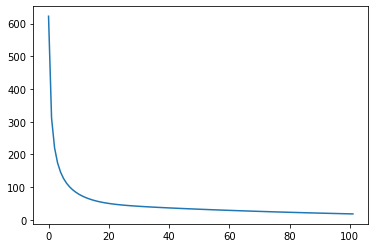

In [152]:
n = 20
A = np.diag(np.array([2 for i in range(n)])) - np.diag(np.array([1 for i in range(n-1)]), 1) - np.diag(np.array([1 for i in range(n-1)]), -1)
A *= (n+1)*(n+1)
b = np.zeros(n); b[0] = 1; b[-1] = 1
    
def gradient_pas_optimal():
    x = np.array([1 for i in range(n)])
    res = np.linalg.norm(A.dot(x)-b)
    
    i = 0
    err = 1.
    
    while i<=100 and err>0.01:
        ps = (A.dot(A.dot(x)-b)).dot(A.dot(x)-b)
        rho = (res*res)/ps
        #print("shape", np.shape((A.dot(A.dot(x)-b)).dot(A.dot(x)-b)))
        #print("ps", ps)
        #print("rho", rho)
        x_ = x-rho*(A.dot(x)-b)
        res = np.linalg.norm(A.dot(x_)-b)
        i += 1
        err = np.linalg.norm(x_-x)
        x = x_
        
    return x

gradient_pas_optimal()    
    

### Question 7)

Vérifier que l'algorithme converge au plus géométriquement, avec une raison égale à $r \overset{def}{=}\tfrac{\kappa -1}{\kappa + 1}$, autrement dit que
$$\|Ax_k - b\| \leqslant C r^k.$$

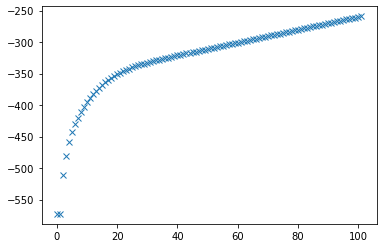

In [154]:
def verif_7():
    x = np.array([1 for i in range(n)])
    Lx = [0]; Ly = [inv_coeff*np.log(np.linalg.norm(A.dot(x)-b))]
    res = np.linalg.norm(A.dot(x)-b)
    
    i = 0
    err = 1.
    
    while i<=100 and err>0.01:
        ps = (A.dot(A.dot(x)-b)).dot(A.dot(x)-b)
        rho = (res*res)/ps
        x_ = x-rho*(A.dot(x)-b)
        res = np.linalg.norm(A.dot(x_)-b)
        i += 1
        err = np.linalg.norm(x_-x)
        Lx.append(i); Ly.append(inv_coeff*np.log(np.linalg.norm(A.dot(x)-b)))
        x = x_
        
    plt.plot(np.array(Lx), np.array(Ly), 'x')
    plt.show()
    
verif_7()
#L'asymptote de la courbe est bien une droite affine de pente environ 1

### Question 8)

Programmer la <i>méthode du gradient conjugué</i> pour le problème de la Question <b>2)</b> avec de nouveau les deux conditions d'arrêt.





<b>Méthode du gradient conjugué pour une fonctionnelle quadratique</b>
$$
\begin{align*}
\textit{Initialisation :}~~~& x_0\in\mathbb R^n\\% \textit{donn\'e}, $\varepsilon$\textit{ donn\'e}\\
&r_0=b-A\cdot x_0 &\textit{(r\'esidu initial)}\\
&p_0=r_0 &\textit{(direction de descente initiale)}\\
&\theta_0=\langle p_0,r_0\rangle \\
\\
\textit{It\'erations : }k\ge 0~~~
&\alpha_k=\theta_k/\langle A p_k\,,\,p_k\rangle  
&\textit{(pas de descente)}\\ 
&x_{k+1}=x_k+\alpha_k\,p_k 
&\textit{(mise \`a jour de la solution)}\\
&r_{k+1}=r_k-\alpha_k\,A p_k
&\textit{(résidu à l'itération } k+1)\\
%&\textit{Arr\^et des it\'erations} : $\Vert r^{(k+1)}\Vert\le\varepsilon$ ?\\

&\theta_{k+1}=\langle r_{k+1},r_{k+1}\rangle\\
&\beta_{k+1}=\theta_{k+1}/\theta_k\\
&p_{k+1}=r_{k+1}+\beta_{k+1}\,p_k
&\textit{(nouvelle direction de descente)}
\end{align*}$$


In [157]:
def gradient_conj():
    
    b = np.array([0, 0])
    A = np.array([[1,  0  ],
                  [0, 1/20]])
    x = np.array([1, 1])
    
    r = b-A.dot(x)
    p = r
    i = 0
    err = 1.
    
    while i<=100 and err>0.01 and np.linalg.norm(r)>0.01:
        alpha = r.dot(r)/(p.dot(A.dot(p)))
        x_ = x + alpha*p
        r_ = r - alpha*A.dot(p)
        
        beta = r_.dot(r_)/r.dot(r)
        p = r_ + beta*p
        i += 1
        
        err = np.linalg.norm(x_-x)
        x = x_; r = r_
            
    return x

gradient_conj()

array([ 2.36182601e-15, -1.11022302e-16])

### Question 9) 

Vérifier numériquement que la méthode converge en réalité en au plus $n$ itérations.

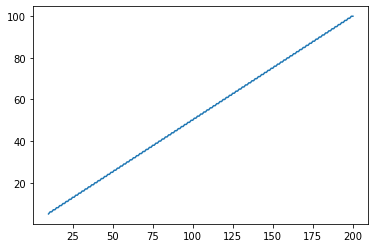

In [158]:
def vitesse_de_convergence_grad_conj():
    Lx = [i for i in range(10, 201)]; Ly = []
    for n in Lx:
        x = np.array([1 for i in range(n)])
        A = np.diag(np.array([2 for i in range(n)])) - np.diag(np.array([1 for i in range(n-1)]), 1) - np.diag(np.array([1 for i in range(n-1)]), -1)
        A *= (n+1)*(n+1)
        b = np.zeros(n); b[0] = 1; b[-1] = 1 
        
        r = b-A.dot(x)
        p = r
        i = 0
        err = 1.
    
        while i<=100 and err>0.01 and np.linalg.norm(r)>0.01:
            alpha = r.dot(r)/(p.dot(A.dot(p)))
            x_ = x + alpha*p
            r_ = r - alpha*A.dot(p)
        
            beta = r_.dot(r_)/r.dot(r)
            p = r_ + beta*p
            i += 1
        
            err = np.linalg.norm(x_-x)
            x = x_; r = r_
        Ly.append(i)
        
    plt.plot(np.array(Lx), np.array(Ly))
    plt.show()
    
vitesse_de_convergence_grad_conj()